# MODELO CLASIFICACION XGBOOST

Presentamos e Importamos todas las librerias que vamos a necesitar a lo largo del modelo.



In [1]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier

Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y el nombre de las Columnas / variables que la componen. Las variables que se refierne a unidades de negocio no las vamos a utilizar en el modelo por lo que las transformamos a Objeto para un mejor entendimiento y segmentacion de las propias variables. 

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,TUTELA,28332.0,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475.0,ASESORAMIENTO FINANCIERO,14204.0,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000.0,ASESORAMIENTO FINANCIERO,14219.0,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [4]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## PRIMERA APROXIMACION AL MODELO

In [5]:
df = df.select_dtypes('number')

In [6]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8576106 (451374, 19)
Datos y = 451374 (451374,)


In [7]:
clfXGBoost = XGBClassifier()

In [8]:
clfXGBoost.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:59:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
clfXGBoost.predict(X)

array([1, 0, 0, ..., 0, 0, 0])

In [10]:
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [11]:
clfXGBoost.fit(X_train,y_train)

[11:59:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
clfXGBoost.predict_proba(X_test)[:, 1]

array([0.00734196, 0.41358268, 0.43320242, ..., 0.08270034, 0.5148063 ,
       0.07456124], dtype=float32)

In [13]:
print('== Primera Aproximacion XGBOOST_model ==')
print ('accuracy_score = ', accuracy_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfXGBoost.predict_proba(X_test)[:, 1]))
print('====================================')


== Primera Aproximacion XGBOOST_model ==
accuracy_score =  0.8747050678482415
precision = 0.5657602663706992
recall = 0.17301654645736106
f1_score = 0.26499447657417635
roc_auc_score = 0.8423034030153255


Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.842


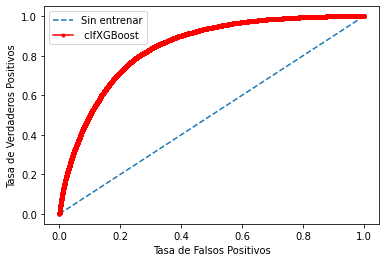

In [14]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clfXGBoost.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfXGBoost.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfXGBoost' , color = "r")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## MODELO

In [15]:
df_normalizado = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalizado.csv')

In [16]:
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y= df_normalizado['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8774052 (417812, 21)
Datos y = 417812 (417812,)


In [17]:
test_size = 0.2
seed = 47
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [18]:
X_train.shape,X_train.shape

((334249, 21), (334249, 21))

In [19]:
X_test.shape,y_test.shape

((83563, 21), (83563,))

In [20]:
clfXGBoost = XGBClassifier()

In [21]:
clfXGBoost.fit(X_train, y_train)

/home/dsc/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:00:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
clfXGBoost.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
clfXGBoost.predict_proba(X_test)[:, 1]

array([0.14762992, 0.17763086, 0.00338308, ..., 0.01277917, 0.00196075,
       0.02799368], dtype=float32)

__Primeros resultados__.
Cogemos como muestra la metrica recall. Los resultados obtenidos en Train estan muy cercanos a los obtenidos en test. Nuestro modelo entrenado está generalizando bien y lo podemos dar por bueno por ahora a falta de conseguir mejores metricas. En caso de haber existido mucha diferencia podria estar indicando overfiting.  Confirmamos que generaliza bien con Cross Validation.


In [24]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfXGBoost.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))

===========RECALL TRAIN============
recall = 0.37647909545095976
===========RECALL TEST=============
recall = 0.3520586182833217


## Tecnicas Validacion Cruzada.  Metrics: Cross validation
Utilizamos Cross Validation para iterar con 'K_folds_veces' a lo largo del set de entrenamiento
- K_Fold utilizado 5 veces.

- Apartaremos 1/5 de muestras.
- Entrenamos al modelo con el restante 4/5 de muestras.
- Mediremos con distintas metricas el resultado obtenido sobre las muestras apartadas.
- Esto quiere decir que hacemos 5 entrenamientos independientes.
- Los resultados serán el promedio de las 5 accuracies anteriores.

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfXGBoost,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfXGBoost,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfXGBoost,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

/home/dsc/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:01:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:01:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/dsc/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:03:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/dsc/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:05:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:06:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:07:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:07:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

(0.7108605542298376, 0.3498598949211909, 0.4683717383983372)

[[70466  1633]
 [ 7428  4036]]


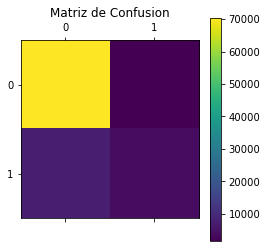

In [26]:
matriz_confusion_clfXGBoost = confusion_matrix(y_test,clfXGBoost.predict(X_test))
print(matriz_confusion_clfXGBoost)
pl.matshow(confusion_matrix(y_test,clfXGBoost.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [27]:
print('========= clfXGBoost================')
print ('accuracy_score = ', accuracy_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfXGBoost.predict_proba(X_test)[:, 1]))
print('====================================')


========= clfXGBoost================
accuracy_score =  0.8915668417840432
precision = 0.711942141471159
recall = 0.3520586182833217
f1_score = 0.47113757076985935
roc_auc_score = 0.8950801970195532


## GridSearchCV  


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
XGBClassifier() 

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [30]:
#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
XGBoost_params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

XGBoostgs = GridSearchCV(
        clfXGBoost,
        XGBoost_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )


In [ ]:
XGBoostgs.fit(X_train,y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 103.8min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 1282.4min


In [ ]:
XGBoostgs.best_score_

In [ ]:
XGBoostgs.best_estimator_

In [ ]:
XGBoostgs.best_params_

## Hacemos el modelo con los mejores parametros

In [ ]:
clfXGBoost = XGBClassifier(colsample_bytree = 1.0,
 gamma = 2,
 max_depth = 5,
 min_child_weight = 1,
 subsample= 0.8)

In [ ]:
clfXGBoost.fit(X_train, y_train)

In [ ]:
clfXGBoost.predict(X_test)

In [ ]:
clfXGBoost.predict_proba(X_test)[:, 1]

In [ ]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfXGBoost.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))

## Metrics: Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfXGBoost,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfXGBoost,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfXGBoost,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

In [ ]:
matriz_confusion_clfXGBoost = confusion_matrix(y_test,clfXGBoost.predict(X_test))
print(matriz_confusion_clfXGBoost)
pl.matshow(confusion_matrix(y_test,clfXGBoost.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [ ]:
print('========= clfXGBoost================')
print ('accuracy_score = ', accuracy_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfXGBoost.predict_proba(X_test)[:, 1]))
print('====================================')
#print('classification_report')
#print(classification_report(y_test, clfknn.predict(X_test)))3c445ddeb657

## Curva Roc

In [ ]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clfXGBoost.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfXGBoost.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfXGBoost' , color = "r")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## *** Conclusiones Modelo ***

- __La metrica elegida__ en el Modelo de clasificacion XGBoost para decidir si estamos ante un buen resultado es __Metrica Recall y AUC - Curva Roc.__ 
- Iniciamos nuestro modelo con una __primera aproximacion__ obteniendo unos resultados __muy mejorables. Recall 0,17.__ La base de datos utilizada es la original sin haber realizado ningun preprocesado. 
- Continuamos evolucionando nuestro modelo. Utilizamos la base de datos normalizada sin PCA.  Bases de datos  preprocesada en nuestro bloque de preprocessing donde hemos adaptado, aplicado Label Encoder, Standar Scalery  Normalizado variables.  
- __Confirmamos que nuestro set de entramiento ha generalizado bien al no haber mucha diferencia entre los resultados obtenidos de Test y Train. Test 0.39 Train 0.37 . Podemos descartar overfiting__ Comprobamos mediante Cross Validation obteniendo medias de distintas metricas.

- Necesitamos mejorar el modelo y para ello utilizamos GridSearch para buscar soluciones y mejores parametros. Una vez obtenidos, entrenamos de nuevo y sacamos nuevamente metricas Recall 0.35 Train - 0.34 
- __Las metricas finales son :  Recall 0.34 - Auc 0.89__
- Dadas las metricas obtenidas consideramos que no es el mejor modelo para nuestro objetivo.
